In [1]:
import matplotlib.pyplot as plt
import numpy as np
from samternary.ternary import Ternary

def plot_ternary_phase_diagram(sand,clay,val=None) :
    # create the figure and the two sets of axes             
    fig, ax_trans = plt.subplots(1,
                            figsize=[16,11.2])

    # transform ax_trans to ternary-plot style, which includes              
    # building axes and labeling the axes                                   
    cob = Ternary(ax_trans, bottom_name = '% Sand', left_name = '% Silt',
                  right_name = '% Clay',labelpad=20,fontsize=20)
    ax_trans.set_title("Soil Ternary Phase Diagram",fontsize=30)

    # use change of bases method within Ternary() to                        
    points = cob.B1_to_B2(sand,clay)

    # affine transform x,y points to ternary-plot basis                     
    if val is not None :
        cs = ax_trans.tricontourf(points[0],points[1],val)
    cs = ax_trans.scatter(points[0],points[1], color='r')

    # add color bar
    cbar = fig.colorbar(cs,ax=ax_trans,shrink=1,label="value")
    fig.subplots_adjust(bottom=0.2,hspace=0.01)

    # align axes to match USDA ternary phase diagram
    plt.xlim([1,0])

    # show plot
    plt.show()
    
    return fig, ax_trans, plt

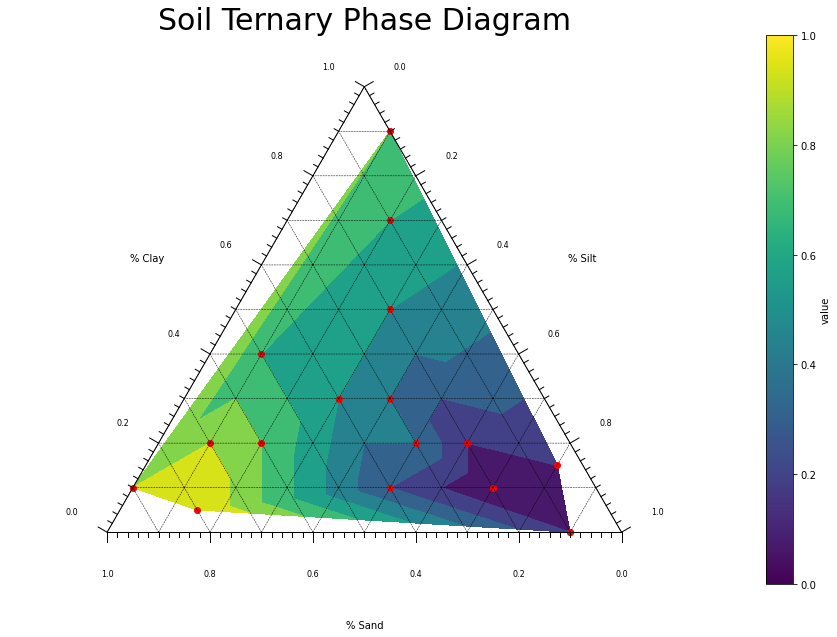

(<Figure size 1152x806.4 with 2 Axes>,
 <AxesSubplot:title={'center':'Soil Ternary Phase Diagram'}>,
 <module 'matplotlib.pyplot' from '/Users/ecoleman/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [2]:
sand_test = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0,
              0.1, 0.2, 0.3, 0.4, 0.2, 0.2, 0.05, 0.1])
clay_test = np.array([0.9, 0.7, 0.5, 0.3, 0.1, 0.2, 0.1, 0.15, 0, 0.1,
              0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
val_test = np.array([1, 2, 3, 4, 5, 6, 7, 8, 7, 6, 5, 4, 3, 2, 1, 0,
              1, 2])

plot_ternary_phase_diagram(sand_test,clay_test,val_test)

In [3]:
def get_psd(alod, aloa) :
    return np.sum(alod * aloa, axis=0)

In [5]:
fake_psd_linspace=np.array([0.375198,0.411878,0.452145,0.496347,0.544872,0.59814,0.656615,0.720807,0.791275,0.868632,0.953552,1.04677,1.14911,1.26145,1.38477,1.52015,1.66876,1.8319,2.011,2.2076,2.42342,2.66033,2.92042,3.20592,3.51934,3.8634,4.2411,4.65572,5.11087,5.61052,6.15902,6.76114,7.42212,8.14773,8.94427,9.81869,10.7786,11.8323,12.9891,14.2589,15.6529,17.1832,18.863,20.7071,22.7315,24.9538,27.3934,30.0714,33.0113,36.2385,39.7813,43.6704,47.9397,52.6264,57.7713,63.4192,69.6192,76.4253,83.8969,92.0988,101.103,110.987,121.837,133.748,146.824,161.177,176.935,194.232,213.221,234.066,256.948,282.068,309.644,339.916,373.147,409.626,449.672,493.633,541.892,594.869,653.025,716.866,786.949,863.883,948.338,1041.05,1142.83,1254.55,1377.2,1511.84,1659.64,1821.89,2000])

def generate_fake_psd(linarr,fracSand,fracSilt) :
    arrSand = (linarr > 50.0).astype('float') * fracSand
    arrSilt = ((linarr <= 50.0).astype('float') * (linarr > 2.0).astype('float')) * fracSilt
    arrClay = (linarr <= 2.0).astype('float') * (1 - fracSand - fracSilt)
    
    return (arrSand + arrSilt + arrClay)


def get_psd_fracs(psd, linarr) :
    arrSand = (linarr > 50.0).astype('float')
    arrSilt = (linarr <= 50.0).astype('float') * (linarr > 2.0).astype('float')
    arrClay = (linarr <= 2.0).astype('float') 

    frcSand = np.sum(psd * arrSand)
    frcSilt = np.sum(psd * arrSilt)
    frcClay = np.sum(psd * arrClay)
    
    return fracSand, fracSilt, fracClay

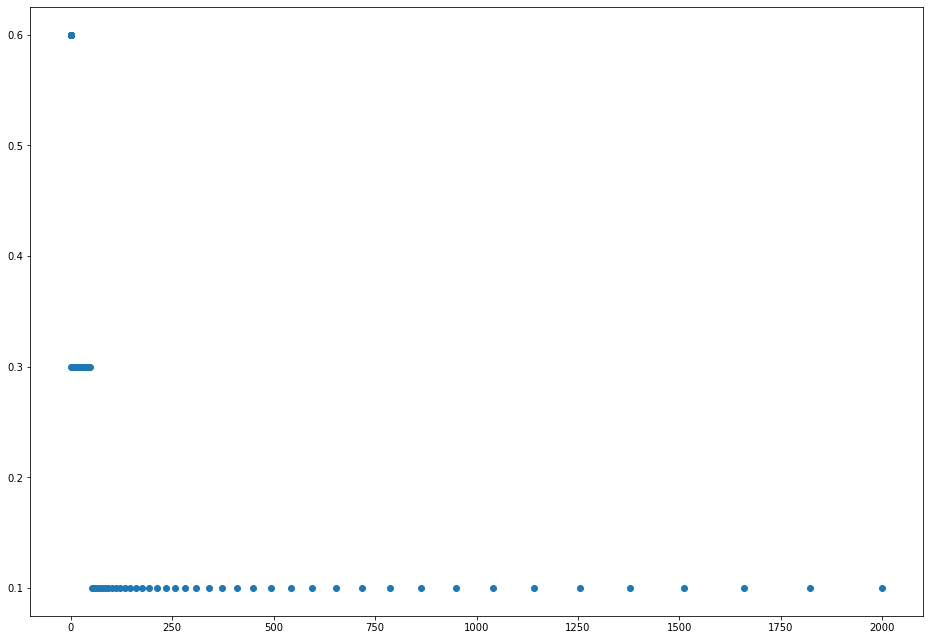

In [6]:
fig, ax = plt.subplots(1,figsize=[16,11.2])
ax.scatter(fake_psd_linspace,generate_fake_psd(fake_psd_linspace,0.1,0.3))

In [ ]:
def get_psd_from_file(path) :
    